# Blogs Dataset

In [1]:
# %cd modularity_aware_gae
# !python train.py --dataset=blogs --features=False --task=task_2 --model=gcn_vae --iterations=200 --learning_rate=0.01 --hidden=32 --dimension=16 --beta=0.75 --lamb=0.5 --gamma=2 --s_reg=10 --fastgae=False --nb_run=1
# %cd ..

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from collections import defaultdict
from datetime import datetime
import re

In [3]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import random
# from collections import defaultdict
# from datetime import datetime
# import re

# def parse_and_visualize_laundering_patterns(file_path, num_patterns=4):
#     """
#     Parse the IBM AML patterns file and visualize random laundering attempts
    
#     Args:
#         file_path: Path to the HI-Small_Patterns.txt file
#         num_patterns: Number of random patterns to visualize
#     """
#     # Read the file
#     with open(file_path, 'r') as f:
#         content = f.read()
    
#     # Extract all patterns using regex
#     pattern_blocks = re.findall(r'(BEGIN LAUNDERING ATTEMPT - [^:]*:?[^\n]*\n(.*?)\nEND LAUNDERING ATTEMPT - [^\n]*)', 
#                                 content, re.DOTALL)
    
#     # Select random patterns
#     selected_patterns = random.sample(pattern_blocks, min(num_patterns, len(pattern_blocks)))
    
#     # Set up visualization
#     fig, axes = plt.subplots(2, 2, figsize=(20, 16))
#     axes = axes.flatten()
    
#     # Process each selected pattern
#     for i, (header, transactions_text) in enumerate(selected_patterns):
#         # Extract pattern type
#         pattern_type = re.search(r'BEGIN LAUNDERING ATTEMPT - ([^:]*)', header).group(1)
        
#         # Process transactions
#         transactions = []
#         for line in transactions_text.strip().split('\n'):
#             if line.strip():
#                 transactions.append(line.split(','))
        
#         # Create a directed graph
#         G = nx.DiGraph()
        
#         # Add nodes and edges
#         for trans in transactions:
#             timestamp = datetime.strptime(trans[0], "%Y/%m/%d %H:%M")
#             from_bank = trans[1]
#             from_acct = trans[2][-4:]  # Last 4 chars for readability
#             to_bank = trans[3]
#             to_acct = trans[4][-4:]    # Last 4 chars for readability
#             amount = float(trans[5])
#             currency = trans[6]
            
#             # Add nodes with attributes
#             G.add_node(from_acct, bank=from_bank)
#             G.add_node(to_acct, bank=to_bank)
            
#             # Add edge with attributes
#             G.add_edge(from_acct, to_acct, 
#                       timestamp=timestamp,
#                       amount=amount, 
#                       currency=currency,
#                       weight=np.log10(amount) if amount > 1 else 1)
        
#         # Choose layout based on pattern type
#         if "CYCLE" in pattern_type:
#             pos = nx.circular_layout(G)
#             color = 'lightblue'
#         elif "FAN-IN" in pattern_type or "GATHER" in pattern_type:
#             pos = nx.spring_layout(G)
#             color = 'lightgreen'
#         elif "FAN-OUT" in pattern_type or "SCATTER" in pattern_type:
#             pos = nx.spring_layout(G)
#             color = 'salmon'
#         elif "STACK" in pattern_type:
#             pos = nx.shell_layout(G)
#             color = 'yellow'
#         elif "BIPARTITE" in pattern_type:
#             pos = nx.bipartite_layout(G, {n for n, d in G.in_degree() if d == 0})
#             color = 'lightgrey'
#         elif "RANDOM" in pattern_type:
#             pos = nx.kamada_kawai_layout(G)
#             color = 'orange'
#         else:
#             pos = nx.spring_layout(G)
#             color = 'lightgrey'
        
#         # Draw the graph
#         ax = axes[i]
        
#         # Determine edge widths based on transaction amounts
#         edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
        
#         # Normalize edge widths for better visualization
#         if edge_widths:
#             min_width = 1
#             max_width = 5
#             edge_widths = [min_width + (w / max(edge_widths)) * (max_width - min_width) for w in edge_widths]
        
#         # Node sizes based on degree
#         node_sizes = [300 + 100 * (G.in_degree(n) + G.out_degree(n)) for n in G.nodes()]
        
#         # Draw graph
#         nx.draw_networkx(
#             G, pos, ax=ax, 
#             node_color=color, 
#             node_size=node_sizes,
#             width=edge_widths,
#             arrows=True,
#             arrowsize=15,
#             font_weight='bold',
#             font_size=10
#         )
        
#         # Add transaction values as edge labels if graph is not too dense
#         if len(G.edges()) < 20:
#             edge_labels = {(u, v): f"{d['currency']}\n{d['amount']:.0f}" for u, v, d in G.edges(data=True)}
#             nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, ax=ax)
        
#         # Set title
#         num_transactions = len(transactions)
#         num_accounts = len(G.nodes())
#         ax.set_title(f"{pattern_type} Pattern\n{num_transactions} transactions, {num_accounts} accounts", fontsize=14)
#         ax.axis('off')
    
#     plt.tight_layout()
#     plt.savefig("random_laundering_patterns.png", dpi=300, bbox_inches='tight')
#     plt.show()
#     return fig

# # Example usage
# # parse_and_visualize_laundering_patterns("data/IBM_AML/HI-Small_Patterns.txt")

In [4]:
# parse_and_visualize_laundering_patterns("./data/IBM_AML/HI-Small_Patterns.txt", num_patterns=4)

In [5]:
import pandas as pd

# Load the CSV file into a pandas dataframe
# only load the first 10000 rows
df = pd.read_csv("data/IBM_AML/HI-Small_Trans.csv", nrows=10000)

# Check for null values
null_values = df.isnull().sum()
print(null_values)

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64


In [6]:
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [7]:
#making our graph- it is undirected

G = nx.from_pandas_edgelist(df, source="Account", target="Account.1", edge_attr="Amount Paid", create_using=nx.Graph())

In [8]:
# checking to see if the graph is directed or undirected
print(nx.info(G))
print(G.is_directed())

Name: 
Type: Graph
Number of nodes: 8330
Number of edges: 8012
Average degree:   1.9236
False


In [9]:
# nx.draw(G, with_labels=True)

In [10]:
account_id = '803177AF0'

In [11]:
def find_two_level_neighbors(df, account_id):
    # Find first level neighbors where the account is either the sender or receiver
    # Note: When pandas loads a CSV with duplicate column names, it appends suffixes
    # The columns are likely named 'Account' and 'Account.1' or similar
    first_level = df[(df['Account'] == account_id) | (df['Account.1'] == account_id)]
    
    # Collect all unique accounts that are first-level neighbors
    source_accounts = set(first_level['Account'])
    target_accounts = set(first_level['Account.1'])
    first_level_accounts = source_accounts.union(target_accounts)
    
    # Find second level neighbors
    second_level = df[(df['Account'].isin(first_level_accounts)) | (df['Account.1'].isin(first_level_accounts))]
    second_level_source = set(second_level['Account'])
    second_level_target = set(second_level['Account.1'])
    second_level_accounts = second_level_source.union(second_level_target)
    
    # Combine first and second level neighbors
    all_neighbors = first_level_accounts.union(second_level_accounts)
    subset_df = df[(df['Account'].isin(all_neighbors)) | (df['Account.1'].isin(all_neighbors))]
    
    return subset_df

In [12]:
two_level_neighbors_df = find_two_level_neighbors(df, account_id)
print(two_level_neighbors_df)

           Timestamp  From Bank    Account  To Bank  Account.1  \
49  2022/09/01 00:14       1674  801009860     1411  80100A2C0   
50  2022/09/01 00:29       1674  801009860     1457  80100D180   
51  2022/09/01 00:11       1674  801009860        1  80100DB80   
53  2022/09/01 00:17       1674  801009860     1674  801009860   
55  2022/09/01 00:22       1457  80100D180    15916  803177AF0   

    Amount Received Receiving Currency  Amount Paid Payment Currency  \
49        424245.00          US Dollar    424245.00        US Dollar   
50          2995.00          US Dollar      2995.00        US Dollar   
51        527190.00          US Dollar    527190.00        US Dollar   
53            17.29          US Dollar        17.29        US Dollar   
55           406.38          US Dollar       406.38        US Dollar   

   Payment Format  Is Laundering  
49         Cheque              0  
50            ACH              0  
51            ACH              0  
53   Reinvestment             

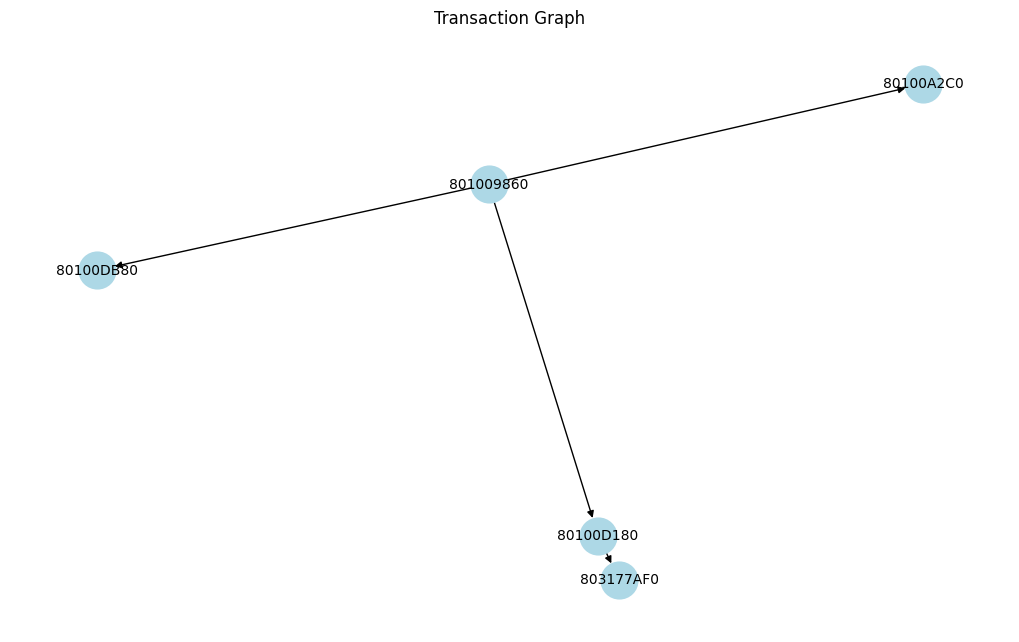

In [13]:
def visualize_transaction_graph(df):
  """
  Visualize the transaction graph from the dataframe.
  
  Args:
    df: pandas DataFrame containing transaction data with columns:
      'Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 
      'Amount Received', 'Receiving Currency', 'Amount Paid', 
      'Payment Currency', 'Payment Format', 'Is Laundering'
  """
  # Create a directed graph
  G = nx.DiGraph()
  
  # Aggregate transaction amounts between accounts
  transaction_sums = df.groupby(['Account', 'Account.1'])['Amount Paid'].sum().reset_index()
  
  # Add nodes and edges to the graph
  for _, row in transaction_sums.iterrows():
    from_acct = row['Account']
    to_acct = row['Account.1']
    amount = row['Amount Paid']
    
    # Add nodes
    G.add_node(from_acct)
    G.add_node(to_acct)
    
    # Add edge with the sum of transaction amounts
    if G.has_edge(from_acct, to_acct):
      G[from_acct][to_acct]['weight'] += amount
    else:
      G.add_edge(from_acct, to_acct, weight=amount)
  
  # Draw the graph
  plt.figure(figsize=(10, 6))  # Adjusted the figure size to be smaller
  pos = nx.spring_layout(G)
  nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', arrows=True)
  plt.title("Transaction Graph")
  plt.show()

# Example usage
visualize_transaction_graph(two_level_neighbors_df)


In [14]:
# save the graph G as list of edges without the edge attribute
nx.write_edgelist(G, "data/IBM_AML/transaction_graph.edgelist", data=False)


In [16]:
%cd modularity_aware_gae
!python train.py --dataset=IBM --features=False --task=task_2 --model=gcn_vae --iterations=200 --learning_rate=0.01 --hidden=32 --dimension=16 --beta=0.75 --lamb=0.5 --gamma=2 --s_reg=10 --fastgae=False --nb_run=1
%cd ..

c:\Users\Moher\Personal\PhD\Projects\modularity_aware_gae\modularity_aware_gae

 
 
 
[MODULARITY-AWARE GRAPH AUTOENCODERS]
 
 
 

EXPERIMENTAL SETTING 

- Graph dataset: IBM
- Mode name: gcn_vae
- Number of models to train: 1
- Number of training iterations for each model: 200
- Learning rate: 0.01
- Dropout rate: 0.0
- Use of node features in the input layer: False
- Dimension of the GCN hidden layer: 32
- Dimension of the output layer: 16
- lambda: 0.5
- beta: 0.75
- gamma: 2.0
- s: 10
- FastGAE: no 

Final embedding vectors will be evaluated on:
- Task 2, i.e., joint community detection and link prediction

 
 
 

LOADING DATA

Loading the IBM graph
c:\Users\Moher\Personal\PhD\Projects\modularity_aware_gae


2025-03-04 01:54:02.139810: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_100.dll'; dlerror: cudart64_100.dll not found
2025-03-04 01:54:02.140071: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Traceback (most recent call last):
  File "train.py", line 96, in <module>
    adj_init, features_init = load_data(FLAGS.dataset)
  File "c:\Users\Moher\Personal\PhD\Projects\modularity_aware_gae\_pyenv\lib\site-packages\modularity_aware_gae-0.0.0-py3.7.egg\modularity_aware_gae\input_data.py", line 73, in load_data
    tx_extended[test_idx_range - min(test_idx_range), :] = tx
ValueError: Error: undefined dataset!
